**Setting up Colab**

In [0]:
# installing wrapper for drive
!pip install PyDrive

     |████████████████████████████████| 993kB 41.7MB/s 
  Created wheel for PyDrive: filename=PyDrive-1.3.1-cp36-none-any.whl size=27435 sha256=f575029e3377a2406a6dcdf285487f0caadc617db21355f17bc5e49e1987d858
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built PyDrive


In [0]:
# importing required libraries for setting up google drive

import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
# drive variable to access drive

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
!ls

adc.json  sample_data


In [0]:
# to download dataset, we use ID of file uploaded on google drive

download = drive.CreateFile({'id': '12oTjaED1HAWtuaR5BR0XjGfGXO7hiVID'})

In [0]:
# downloading file and unzip it

download.GetContentFile('Image_2.zip')
!unzip Image_2.zip

Archive:  Image_2.zip
   creating: Image_2/
  inflating: Image_2/.DS_Store       
   creating: __MACOSX/
   creating: __MACOSX/Image_2/
  inflating: __MACOSX/Image_2/._.DS_Store  
   creating: Image_2/Code/
   creating: Image_2/Configuration/
  inflating: Image_2/Configuration/.DS_Store  
   creating: __MACOSX/Image_2/Configuration/
  inflating: __MACOSX/Image_2/Configuration/._.DS_Store  
  inflating: Image_2/Configuration/config.csv  
   creating: Image_2/Input/
  inflating: Image_2/Input/.DS_Store  
   creating: __MACOSX/Image_2/Input/
  inflating: __MACOSX/Image_2/Input/._.DS_Store  
   creating: Image_2/Input/Dataset/
  inflating: Image_2/Input/Dataset/.DS_Store  
   creating: __MACOSX/Image_2/Input/Dataset/
  inflating: __MACOSX/Image_2/Input/Dataset/._.DS_Store  
   creating: Image_2/Input/Dataset/test/
  inflating: Image_2/Input/Dataset/test/.DS_Store  
   creating: __MACOSX/Image_2/Input/Dataset/test/
  inflating: __MACOSX/Image_2/Input/Dataset/test/._.DS_Store  
  inflating: 

In [0]:
# checking current location

!pwd


/content


**Importing Libraries for our model**

In [0]:
import glob
from keras.preprocessing import image
from keras.utils import to_categorical
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd


**Loading the Data**

In [0]:
# path where training data is stored

path1 = 'Image_2/Input/Dataset/train/category 1/*.png'
path2 = 'Image_2/Input/Dataset/train/category 2/*.png'
path3 = 'Image_2/Input/Dataset/train/category 3/*.png'
path4 = 'Image_2/Input/Dataset/train/category 4/*.png'

paths_list = [path1,path2,path3,path4]

# creating x= Image_Id, y =labels  for our model

train_image = []
train_labels = []

for path in paths_list:
    
    filenames = glob.glob(path)

    for filename in filenames:
        
        # loading the data and converting them into lower dimensions of (128 X 128) for fast processing
        img = image.load_img(filename, target_size=(128,128,3), grayscale= False )
        
        img = image.img_to_array(img)
        
        img = img/255
        
        train_image.append(img)
        
        
        label = filename.split(os.path.sep)[-2]
        
        train_labels.append(label)
        
x = np.array(train_image)

print("%s\t%s" % ("actual classes", train_labels))
# multi-class classification for 4 classes we use one hot encoder 
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(train_labels)
encoded_Y = encoder.transform(train_labels)
print("%s\t%s" % ("encoded classes",encoded_Y))

# convert integers to dummy variables (i.e. one hot encoded)
y = to_categorical(encoded_Y)


actual classes	['category 1', 'category 1', 'category 1', 'category 1', 'category 1', 'category 1', 'category 1', 'category 1', 'category 1', 'category 1', 'category 1', 'category 1', 'category 1', 'category 1', 'category 1', 'category 1', 'category 1', 'category 1', 'category 1', 'category 1', 'category 1', 'category 1', 'category 1', 'category 1', 'category 1', 'category 1', 'category 1', 'category 1', 'category 1', 'category 1', 'category 1', 'category 1', 'category 1', 'category 1', 'category 1', 'category 1', 'category 1', 'category 1', 'category 1', 'category 1', 'category 1', 'category 1', 'category 1', 'category 1', 'category 1', 'category 1', 'category 1', 'category 1', 'category 1', 'category 1', 'category 1', 'category 1', 'category 1', 'category 1', 'category 1', 'category 1', 'category 1', 'category 1', 'category 1', 'category 1', 'category 1', 'category 1', 'category 1', 'category 1', 'category 1', 'category 1', 'category 1', 'category 1', 'category 1', 'category 1', 'cat

In [0]:
# checking shape of our data and its labels
print(x.shape)
print(y.shape)

(440, 128, 128, 3)
(440, 4)


In [0]:
# creating validation set from training data
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

**Defining Model's Architecture**

In [0]:
# architecture with 5 convolutional layer with one dense hidden layer and an output layer

model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss ='categorical_crossentropy', optimizer ='rmsprop', metrics =['accuracy']) 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_185 (Conv2D)          (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_185 (MaxPoolin (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_186 (Conv2D)          (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_186 (MaxPoolin (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_187 (Conv2D)          (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_187 (MaxPoolin (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_33 (Batc (None, 14, 14, 64)        256       
__________

**Training the Model**

In [0]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))
model.save_weights('model_saved.h5') 

Train on 352 samples, validate on 88 samples
Epoch 1/100
352/352 [==============================] - 0s 957us/step - loss: 0.0752 - acc: 0.9943 - val_loss: 0.8064 - val_acc: 0.9432
Epoch 2/100
352/352 [==============================] - 0s 751us/step - loss: 0.0370 - acc: 0.9943 - val_loss: 0.7392 - val_acc: 0.9205
Epoch 3/100
352/352 [==============================] - 0s 761us/step - loss: 0.0230 - acc: 0.9943 - val_loss: 0.7815 - val_acc: 0.9205
Epoch 4/100
352/352 [==============================] - 0s 799us/step - loss: 0.0339 - acc: 0.9943 - val_loss: 1.2522 - val_acc: 0.8636
Epoch 5/100
352/352 [==============================] - 0s 801us/step - loss: 0.0151 - acc: 0.9886 - val_loss: 0.9167 - val_acc: 0.8864
Epoch 6/100
352/352 [==============================] - 0s 813us/step - loss: 0.0027 - acc: 0.9972 - val_loss: 0.8600 - val_acc: 0.8977
Epoch 7/100
352/352 [==============================] - 0s 767us/step - loss: 0.0050 - acc: 0.9972 - val_loss: 0.6149 - val_acc: 0.9205
Epoch 8/10

**Esitimating the Model's performance**

In [0]:
# Model evaluation
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 92.05%


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


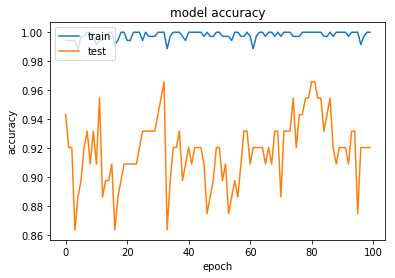

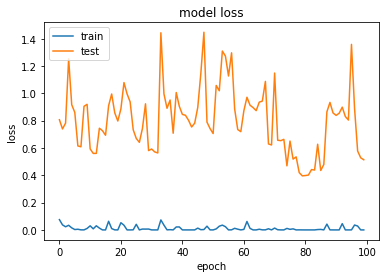

In [0]:
# plotting model accuracy and model loss

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
# prepraing testing dataset for prediction

test_image = []
test_file = []

# path where test dataset is stored
filenames1 = glob.glob('Image_2/Input/Dataset/test/*.png')

for filename in filenames1:
  
        
  img = image.load_img(filename, target_size=(128,128,3), grayscale= False )
  test_file.append(filename)      
        
  img = image.img_to_array(img)
        
  img = img/255
        
  test_image.append(img)
        
test = np.array(test_image)

In [0]:
# predicted classes corresponding to input test data

prediction = model.predict_classes(test)
print(prediction)
print(len(prediction))

[2 1 0 0 2 1 0 1 3 2 0 3 2 2 1 2 2 3 2 1 1 2 1 0 3 1 2 3 1 2]
30


In [0]:
# opening submission file for getting respective idea and storing it to csv for fruther use

sample = pd.read_csv('Image_2/Output/results.csv')
sample['imageId'] = test_file 

sample['predicted_labels'] = prediction
sample.to_csv('sample.csv', header=True, index=False)

In [0]:
# checking out predicted data

output = pd.read_csv('sample.csv')
output

,imageId,predicted_labels
0,Image_2/Input/Dataset/test/Test_original_4051....,2
1,Image_2/Input/Dataset/test/Test_original_6053....,1
2,Image_2/Input/Dataset/test/1052.png,0
3,Image_2/Input/Dataset/test/1051.png,0
4,Image_2/Input/Dataset/test/Test_original_4052....,2
5,Image_2/Input/Dataset/test/Test_original_6052....,1
6,Image_2/Input/Dataset/test/Test_original_1052....,0
7,Image_2/Input/Dataset/test/Test_original_6052....,1
8,Image_2/Input/Dataset/test/C052.png,3
9,Image_2/Input/Dataset/test/Test_original_4043....,2
